In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('C:/Users/UserK/Desktop/archive/Google-Playstore.csv')

In [3]:
# 전처리
# drop을 이용하여 사용하지 않을 컬럼 삭제
data = data.drop(data.columns[[4,5,6,11,12,13,14,15,19,23]], axis=1)
data.head()

,App Name,App Id,Category,Rating,Maximum Installs,Free,Price,Currency,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,15,True,0.0,USD,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,7662,True,0.0,USD,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,58,True,0.0,USD,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,19,True,0.0,USD,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,478,True,0.0,USD,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


In [4]:
# 결측치 제거
data = data.dropna(axis=0)

1. 연도별로 출시된 어플의 개수 데이터 시각화

In [5]:
# released_date = pd.DataFrame({'Date': pd.to_datetime(data['Released'])}, index = data['App Name'])
# released_date['year'] = released_date['Date'].dt.strftime('%Y')

# data['year'] = data['Released'].dt.year
# data['year']

# Released 컬럼에서 2011~2020만 추출하고 싶어서 리스트에 담은 뒤 str.contains를 이용하여 정제
date_list = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
date = '|'.join(date_list)
data = data[data['Released'].str.contains(date)]

In [6]:
# 연도부분만 이용하고싶어서 year라는 컬럼 생성하여 데이터 저장
data['year'] = data['Released'].str[-4:]
data

,App Name,App Id,Category,Rating,Maximum Installs,Free,Price,Currency,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,year
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,15,True,0.0,USD,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2020
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,7662,True,0.0,USD,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2020
2,Vibook,com.doantiepvien.crm,Productivity,0.0,58,True,0.0,USD,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2019
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,19,True,0.0,USD,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2018
4,GROW.me,com.horodyski.grower,Tools,0.0,478,True,0.0,USD,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,1980,True,0.0,USD,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False,2018
2312940,ORU Online,com.threedream.oruonline,Education,0.0,430,True,0.0,USD,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False,2018
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,202,True,0.0,USD,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False,2018
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,2635,True,0.0,USD,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False,2016


In [7]:
# 연도별로 출시된 어플의 개수를 세고싶어서 year로 그룹화하여 그래프 그릴 때 사용
year_count = data.groupby(by=['year'], as_index = False).count()

year_count

,year,App Name,App Id,Category,Rating,Maximum Installs,Free,Price,Currency,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,2011,14359,14359,14359,14359,14359,14359,14359,14359,14359,14359,14359,14359,14359,14359
1,2012,25743,25743,25743,25743,25743,25743,25743,25743,25743,25743,25743,25743,25743,25743
2,2013,42474,42474,42474,42474,42474,42474,42474,42474,42474,42474,42474,42474,42474,42474
3,2014,71811,71811,71811,71811,71811,71811,71811,71811,71811,71811,71811,71811,71811,71811
4,2015,115430,115430,115430,115430,115430,115430,115430,115430,115430,115430,115430,115430,115430,115430
5,2016,167104,167104,167104,167104,167104,167104,167104,167104,167104,167104,167104,167104,167104,167104
6,2017,259672,259672,259672,259672,259672,259672,259672,259672,259672,259672,259672,259672,259672,259672
7,2018,334541,334541,334541,334541,334541,334541,334541,334541,334541,334541,334541,334541,334541,334541
8,2019,480619,480619,480619,480619,480619,480619,480619,480619,480619,480619,480619,480619,480619,480619
9,2020,544803,544803,544803,544803,544803,544803,544803,544803,544803,544803,544803,544803,544803,544803


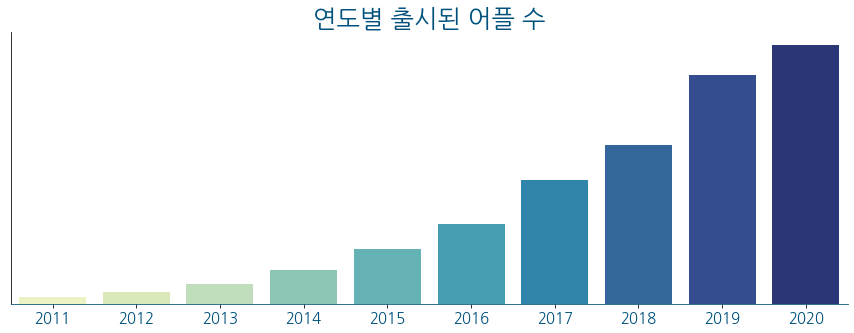

In [34]:

plt.figure(figsize=(15,5))
bar = sns.barplot(data=year_count, x=year_count.year, y='App Name',palette='YlGnBu')

plt.ylabel(None)
plt.xlabel(None)

plt.rcParams['font.family'] = 'NanumGothic'
plt.title('연도별 출시된 어플 수', color = "#00517C", size = 25) #제목 표시

# 오른쪽, 위, 왼쪽 테두리 제거
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)

plt.gca().spines['bottom'].set_color('#00517C') #x축 색상
plt.xticks(color='#00517C', fontsize =15) #xticks 색상과 폰트 크기 조정

plt.yticks(ticks=[])

plt.show()

2. 카테고리별 데이터 시각화

In [12]:
# 카테고리 개수 확인
len(data.groupby('Category'))

48

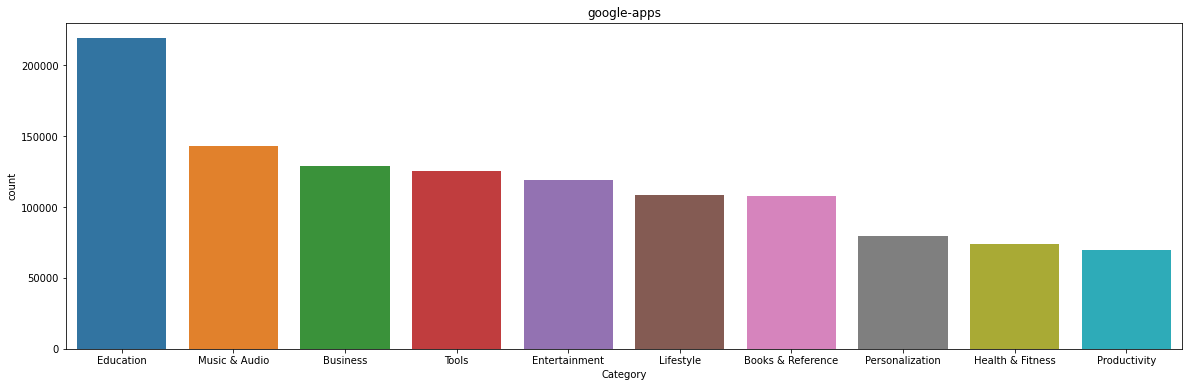

In [13]:
# 카테고리별 데이터 시각화 1-2 
# 카테고리내 앱의 개수 상위 10개

plt.figure(figsize=(20,6))

sns.countplot(data = data, x = "Category",order = data['Category'].value_counts().iloc[:10].index)
plt.title('google-apps')

plt.show()

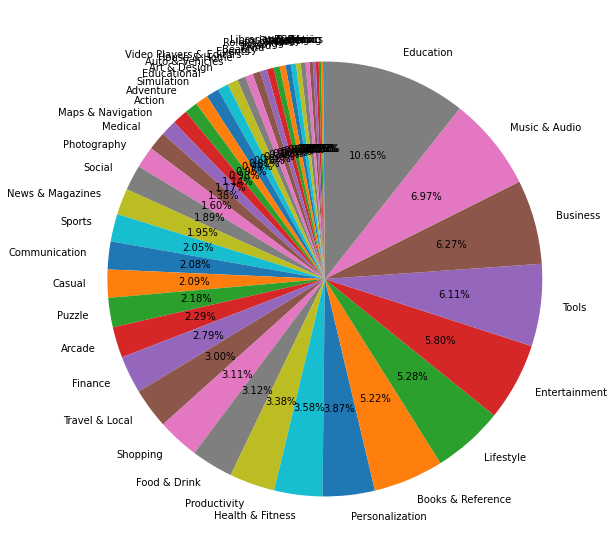

In [14]:
# 카테고리별 데이터 시각화2
category = data.groupby(['Category'])['Category'].count().sort_values()

group_names = category.index
group_sizes = category.values

fig = plt.figure(figsize=(10, 10))


# startangle 로 원 회전
plt.pie(group_sizes, 
        labels = group_names, 
        autopct='%1.2f%%',
        startangle = 90) 


plt.show()

3. 평점에 따른 어플 데이터 시각화

In [16]:
# Rating을 int형으로 변환하여 소수점을 버림

def floatToInt(x):
      return int(x)
data['Rating'] = data['Rating'].apply(floatToInt)

In [17]:
rating_count = data.groupby(by=['Rating'], as_index = False).count()

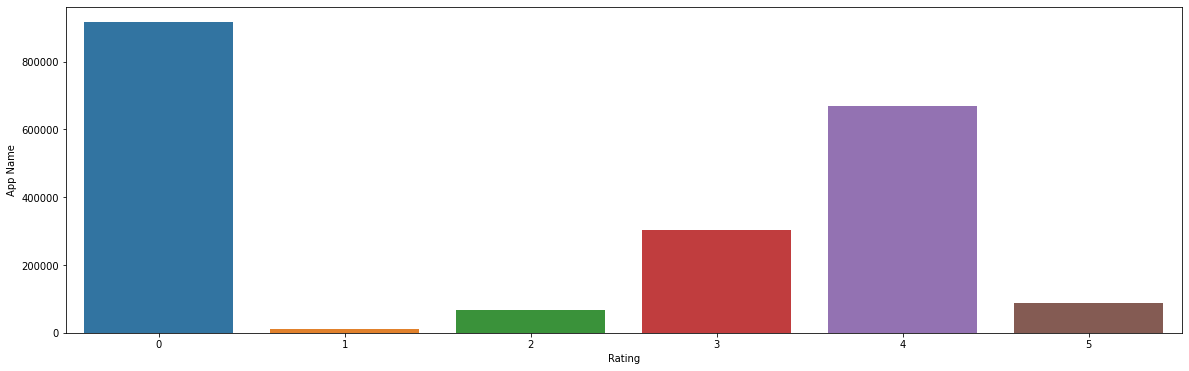

In [18]:
plt.figure(figsize=(20,6))
sns.barplot(data=rating_count, x=rating_count.Rating, y='App Name')
plt.show()

In [19]:
# 평점과 다운로드 수의 상관관계


